In [1]:
import os
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sborn
import plotly.offline as pltoff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import plotly.graph_objs as grph


In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
# Set up Plotly for offline use
pltoff.init_notebook_mode(connected=True)

In [4]:
import warnings

from packaging import version 

warnings.filterwarnings("ignore", category=DeprecationWarning, message="distutils Version classes are deprecated. Use packaging.version instead.")
warnings.filterwarnings("ignore", category=DeprecationWarning, message="`np.bool8` is a deprecated alias for the `np.bool_`.")

warnings.filterwarnings("ignore", category=DeprecationWarning)

warnings.filterwarnings("once")

warnings.simplefilter("ignore")

warnings.filterwarnings("default")


warnings.filterwarnings("ignore", category=ResourceWarning)  # Suppress ResourceWarnings


warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

warnings.filterwarnings("ignore", message="is_sparse is deprecated and will be removed in a future version.*")

warnings.filterwarnings("ignore", message="The 'S' method for sort is deprecated")

In [5]:
'''
Loading of dataset using pandas.
'''
data = pds.read_csv("breast-cancer-wisconsin.csv")
print(data.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [6]:
'''
Dataset Shape.
'''
print("Number of rows in Dataset",data.shape[0])
print("Number of columns in Dataset", data.shape[1])


Number of rows in Dataset 569
Number of columns in Dataset 32


In [7]:
'''
Overview of the data
'''
print("\nData Types of Attributes present in dataset:\n", data.dtypes)
print("\nSummary of the data:\n", data.describe())
total_missing_values = data.isnull().sum()
print("\nMissing Values present in data:\n", total_missing_values)


Data Types of Attributes present in dataset:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactn


Count of Unique Values of features:
 id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
f

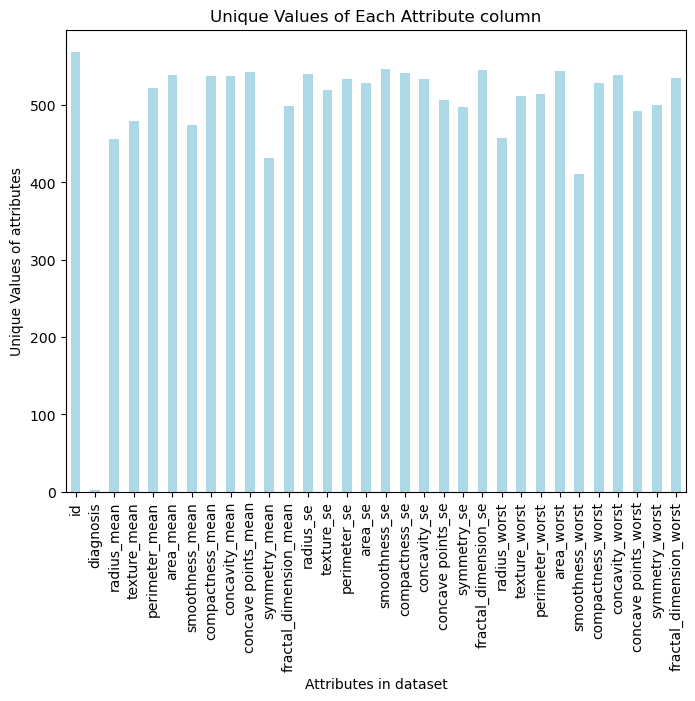

In [8]:
unique_values = data.nunique()
print("\nCount of Unique Values of features:\n", unique_values)

'''
Visualizing unique value counts
'''
plt.figure(figsize=(8, 6))

data.nunique().plot(kind='bar', color='lightblue')

plt.title('Unique Values of Each Attribute column')

plt.xlabel('Attributes in dataset')

plt.ylabel('Unique Values of attributes')

plt.show()

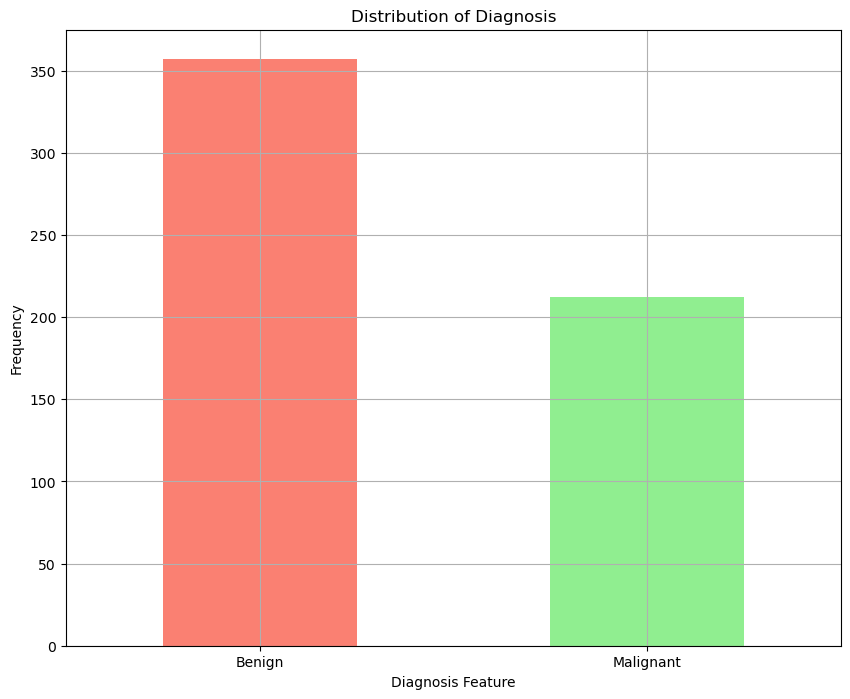

In [9]:


'''
Encoding the 'diagnosis' 
Converting categorical values of 'diagnosis' attribute to numerical values
Assigning 1 to Malignant patients
Assigning 0 to Benign patients
'''
data['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)


'''
 Visualising Number of malignant and Benign count.
 Plotting the graph using matplotlib library.
 '''
distr_diag = data.groupby('diagnosis').size()
plt.figure(figsize=(10, 8))
distr_diag.plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Distribution of Diagnosis')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'], rotation=0)
plt.ylabel('Frequency')
plt.xlabel('Diagnosis Feature')
plt.grid(True)
plt.show()

In [10]:
id_column = 'id'
dependent_feature = 'diagnosis'

# Separate categorical and numerical columns
cate_colmns = []
for i in data.columns:
    if data[i].dtype == 'object':
        cate_colmns.append(i)

numerical_columns = []
excluded_columns = cate_colmns + [id_column, dependent_feature]
for i in data.columns:
    if i not in excluded_columns:
        numerical_columns.append(i)


bin_colmns = []
for i in data.columns:
    if data[i].nunique() == 2:
        bin_colmns.append(i)

multi_value_cols = []
for i in cate_colmns:
    if i not in bin_colmns:
        multi_value_cols.append(i)


# Label encode binary columns
label_encoder = LabelEncoder()
data[bin_colmns] = data[bin_colmns].apply(lambda col: label_encoder.fit_transform(col))


# # Convert multi-value categorical columns to one-hot encoded format
# if multi_value_cols:  # Check if there are any multi-value columns to encode
#     data = pd.concat([data.drop(columns=multi_value_cols), pd.get_dummies(data[multi_value_cols])], axis=1)
# else:
#     print("No multi-value categorical columns to encode.")

In [11]:
# Import necessary class for scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaling object for numerical data
numerical_scaler = StandardScaler()

# Perform the fit and transform operations in one step for the numerical columns
transformed_numerical_data = numerical_scaler.fit_transform(data.loc[:, numerical_columns])

# Construct a DataFrame from the scaled numerical data
scaled_numerical_dataframe = pds.DataFrame(transformed_numerical_data, columns=numerical_columns, index=data.index)

# Combine the original data (excluding old numerical columns) with the new scaled numerical data
dataset_scaled = data.drop(columns=numerical_columns).join(scaled_numerical_dataframe)


C:\Users\gurra\anaconda\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



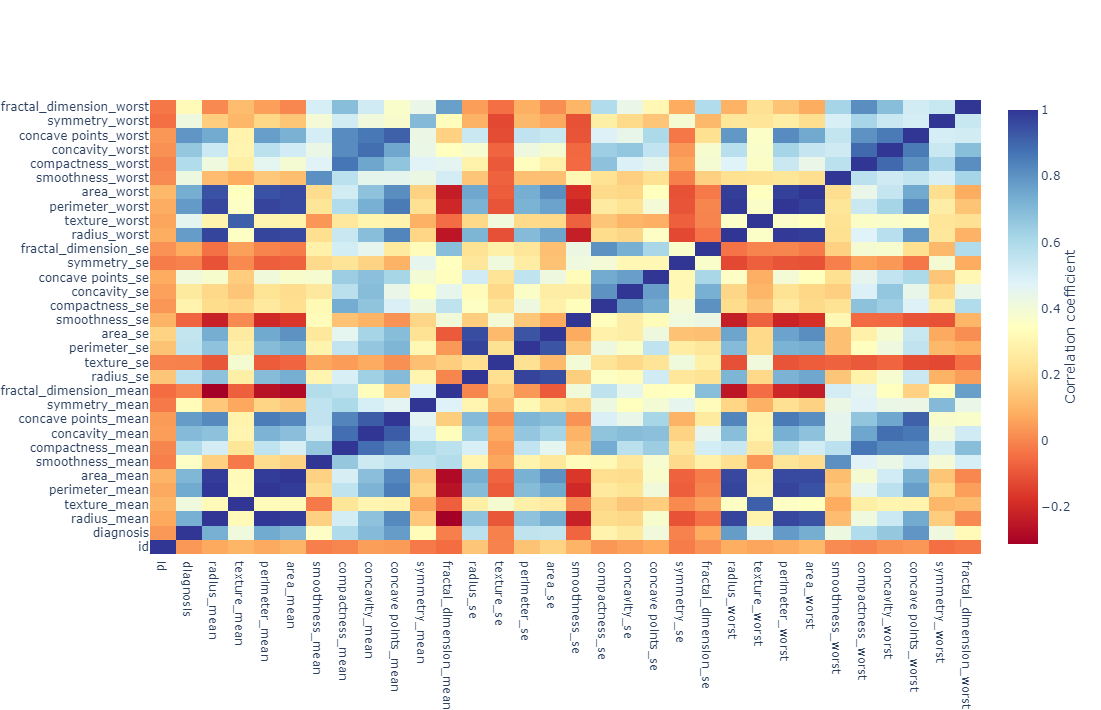

In [12]:
'''
Correlation matrix visualization
'''
feat_corrltm = dataset_scaled.corr()

mat_clmns = feat_corrltm.columns.tolist()

cor_lst_arr = feat_corrltm.values


trace = grph.Heatmap(z=cor_lst_arr, x=mat_clmns, y=mat_clmns,
                     colorscale="RdYlBu",  
                     colorbar=dict(title="Correlation coefficient",titleside="right"))


layout = grph.Layout( height=710, width=710)

fig = grph.Figure(data=[trace], layout=layout)

fig.show()

In [13]:
'''
train data and test data splitting.
'''
trning_dt,tsting_dt = train_test_split(dataset_scaled,test_size = .25 ,random_state = 42)
    
# Extracting feature columns (independent variables)
independent_features = []
excluded_features = id_column + dependent_feature
for val in dataset_scaled.columns:
    if val not in excluded_features:
        independent_features.append(val)

# Separating independent and dependent variables for training set
x_trning_dt_set = trning_dt[independent_features]
y_trning_dt_set = trning_dt[dependent_feature]

# Separating independent and dependent variables for testing set
x_tsting_dt_set = tsting_dt[independent_features]
y_tsting_dt_set = tsting_dt[dependent_feature]

In [14]:


def plot_confus_mtrx(input,title):
    fig, dimen = plt.subplots(figsize=(6, 4))
    map_coloring = plt.cm.Blues
    im = dimen.imshow(input, interpolation='nearest', cmap=map_coloring)

    # Add a color bar to the plot
    plt.colorbar(im, ax=dimen)

    # Define the label names for the input
    label_cls = ['Positive', 'Negative']

    # Set tick marks for class labels
    axis_ticks = np.arange(len(label_cls))
    plt.xticks(axis_ticks, label_cls, rotation=90)
    plt.yticks(axis_ticks, label_cls)

    # Set axis labels and the title
    dimen.set_xlabel('Predicted Labels')
    dimen.set_ylabel('True Labels')
    dimen.set_title(title)

    # Define text formatting inside the input boxes
    val = 'd'  # Decimal integer
    threshold_val = input.max() / 2.
    # Iterate over data dimensions for text annotations
    dimen1 = input.shape[0]
    dimen2 = input.shape[1]
    for row in range(dimen1):
        for col in range(dimen2):
            dimen.text(col, row, format(input[row, col], val),
                    ha="center", va="center",
                    color="white" if input[row, col] > threshold_val else "black")

    # Improve layout to prevent clipping of tick-labels
    plt.tight_layout()
    plt.show()



In [15]:
def plot_roc_curve(fprates, tprates, roc_auc):
    plt.figure(figsize=(7, 5))  
    plt.plot(fprates, tprates, lw=2, color='skyblue', label='Receiver Operating Characteristic Curve (AUC = %0.4f)' % roc_auc)  
    plt.plot([0, 1], [0, 1],lw=2, color='darkgreen', linestyle='dotted') 
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')  # Move legend to upper left
    plt.grid(False)  # Add a grid for better readability
    plt.show()


In [16]:
def plot_feature_importances(coefficients, features, title):
    
    Feature_Importance = pds.DataFrame({'Coefficients': coefficients.ravel(),'Features': features})
    plot=Feature_Importance.sort_values(by='Coefficients',ascending=False)

    # Plotting
    plt.figure(figsize=(9, 5))
    plt.bar(plot['Features'], plot['Coefficients'], color='green')
    plt.xlabel('Features present in Dataset.')
    plt.ylabel('Coefficient Values')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

In [17]:
fprate_curves = []
tprate_curves = []
auc_curves = []
def classification_algo_with_feature_imp(algo, x_trning_dt_set, x_tsting_dt_set, y_trning_dt_set, y_tsting_dt_set, independent_features, cf_notation,title):
    
    algo.fit(x_trning_dt_set, y_trning_dt_set)
    
    # Training set predictions and probabilities
    train_set_predic = algo.predict(x_trning_dt_set)
    train_set_probs = algo.predict_proba(x_trning_dt_set)
    
   
    
    # Classification report for training set
    print("\nClassification Report for Training Set:")
    print(classification_report(y_trning_dt_set, train_set_predic))

    # Confusion matrix and plots for training set
    print("Confusion Matrix for Training Set:")
    train_conf_matrix = confusion_matrix(y_trning_dt_set, train_set_predic)
    plot_confus_mtrx(train_conf_matrix, "Confusion Matrix for Training Set")
    
     # Training set accuracy
    train_set_accu = accuracy_score(y_trning_dt_set, train_set_predic)
    print("Training Accuracy:", train_set_accu)

    # ROC curve for training set
    fprate_train_set, tprate_train_set, _ = roc_curve(y_trning_dt_set, train_set_probs[:, 1])
    roc_auc_train_set = roc_auc_score(y_trning_dt_set, train_set_predic)
    print("Area under ROC curve:", roc_auc_train_set)
    plot_roc_curve(fprate_train_set, tprate_train_set, roc_auc_train_set)
    
    # Test set predictions and probabilities
    test_set_predic = algo.predict(x_tsting_dt_set)
    test_set_prob = algo.predict_proba(x_tsting_dt_set)

    # Classification report for test set
    print("\nClassification Report for Test Set:")
    print(classification_report(y_tsting_dt_set, test_set_predic))

    # Confusion matrix and plots for test set
    print("\nConfusion Matrix for Test Set:")
    tst_confu_mat = confusion_matrix(y_tsting_dt_set, test_set_predic)
    plot_confus_mtrx(tst_confu_mat, "Confusion Matrix for Test Set")

    # Accuracy and ROC curve for test set
    accuracy = accuracy_score(y_tsting_dt_set, test_set_predic)
    print("Test Accuracy:", accuracy)

    roc_auc_test_set = roc_auc_score(y_tsting_dt_set, test_set_predic)
    print("Area under ROC curve:", roc_auc_test_set)
    auc_curves.append(roc_auc_test_set)

    fprate, tprate, _ = roc_curve(y_tsting_dt_set, test_set_prob[:, 1])
    tprate_curves.append(tprate)
    fprate_curves.append(fprate)
    plot_roc_curve(fprate, tprate, roc_auc_test_set)

    # Feature coefficients or importances
    if cf_notation == "coefficients":
        feature_vals = algo.coef_.ravel()
    elif cf_notation == "features":
        feature_vals = algo.feature_importances_
    
    # Plot feature importances using the separated function
    
    plot_feature_importances(feature_vals, independent_features,title)



In [18]:
fprate_curves = []
tprate_curves = []
auc_curves = []
def classification_algo_without_feature_imp(algo, x_trning_dt_set, x_tsting_dt_set, y_trning_dt_set, y_tsting_dt_set,title):
    
    algo.fit(x_trning_dt_set, y_trning_dt_set)
    
    # Training set predictions and probabilities
    train_set_predic = algo.predict(x_trning_dt_set)
    train_set_probs = algo.predict_proba(x_trning_dt_set)
    
   
    
    # Classification report for training set
    print("\nClassification Report for Training Set:")
    print(classification_report(y_trning_dt_set, train_set_predic))

    # Confusion matrix and plots for training set
    print("Confusion Matrix for Training Set:")
    train_conf_matrix = confusion_matrix(y_trning_dt_set, train_set_predic)
    plot_confus_mtrx(train_conf_matrix, "Confusion Matrix for Training Set")
    
     # Training set accuracy
    train_set_accu = accuracy_score(y_trning_dt_set, train_set_predic)
    print("Training Accuracy:", train_set_accu)

    # ROC curve for training set
    fprate_train_set, tprate_train_set, _ = roc_curve(y_trning_dt_set, train_set_probs[:, 1])
    roc_auc_train_set = roc_auc_score(y_trning_dt_set, train_set_predic)
    print("Area under ROC curve:", roc_auc_train_set)
    plot_roc_curve(fprate_train_set, tprate_train_set, roc_auc_train_set)
    
    # Test set predictions and probabilities
    test_set_predic = algo.predict(x_tsting_dt_set)
    test_set_prob = algo.predict_proba(x_tsting_dt_set)

    # Classification report for test set
    print("\nClassification Report for Test Set:")
    print(classification_report(y_tsting_dt_set, test_set_predic))

    # Confusion matrix and plots for test set
    print("\nConfusion Matrix for Test Set:")
    tst_confu_mat = confusion_matrix(y_tsting_dt_set, test_set_predic)
    plot_confus_mtrx(tst_confu_mat, "Confusion Matrix for Test Set")

    # Accuracy and ROC curve for test set
    accuracy = accuracy_score(y_tsting_dt_set, test_set_predic)
    print("Test Accuracy:", accuracy)

    roc_auc_test_set = roc_auc_score(y_tsting_dt_set, test_set_predic)
    print("Area under ROC curve:", roc_auc_test_set)
    auc_curves.append(roc_auc_test_set)

    fprate, tprate, _ = roc_curve(y_tsting_dt_set, test_set_prob[:, 1])
    tprate_curves.append(tprate)
    fprate_curves.append(fprate)
    plot_roc_curve(fprate, tprate, roc_auc_test_set)





Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       268
           1       0.99      0.97      0.98       158

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.98       426
weighted avg       0.99      0.99      0.99       426

Confusion Matrix for Training Set:


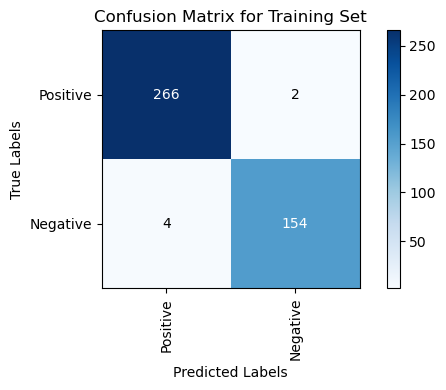

Training Accuracy: 0.9859154929577465
Area under ROC curve: 0.9836104288683166


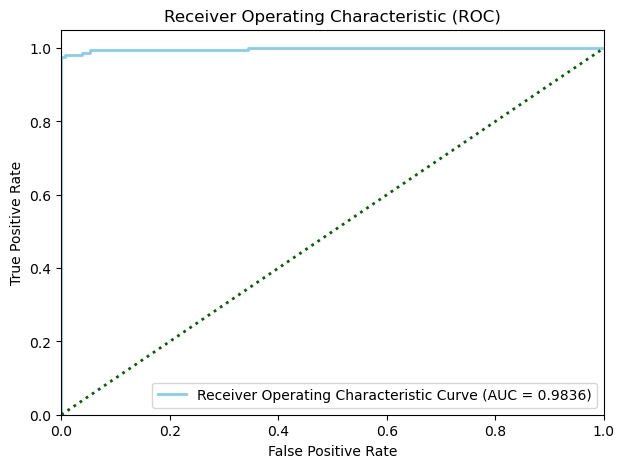


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143


Confusion Matrix for Test Set:


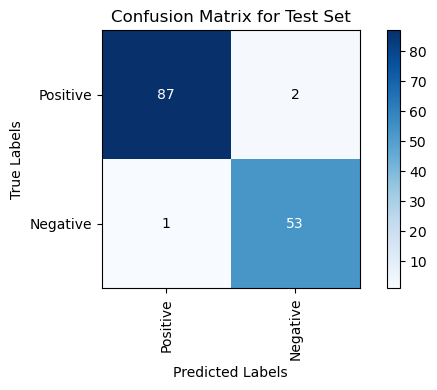

Test Accuracy: 0.9790209790209791
Area under ROC curve: 0.9795047856845608


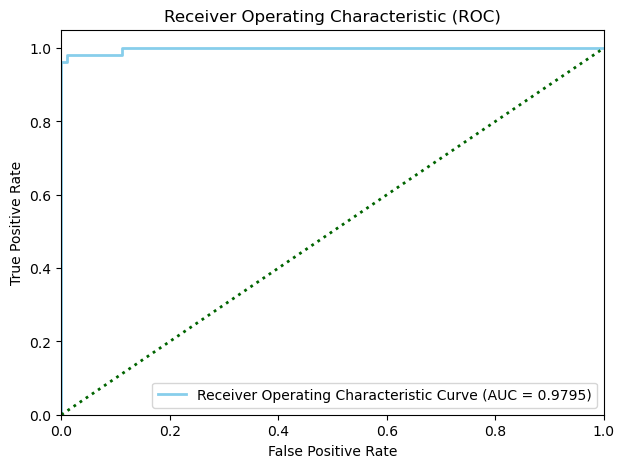

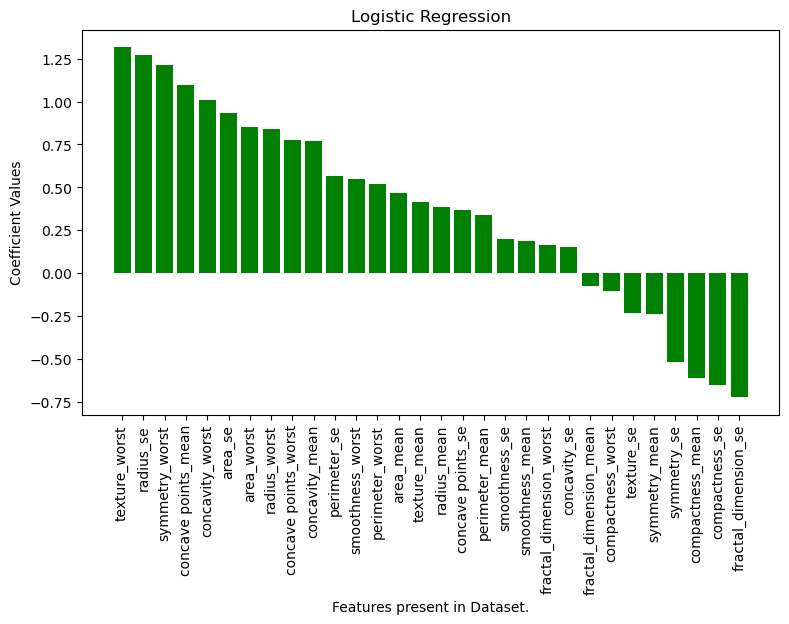

In [19]:
# Example usage
logistic_model = LogisticRegression(solver='liblinear')

classification_algo_with_feature_imp(logistic_model, x_trning_dt_set, x_tsting_dt_set, y_trning_dt_set, y_tsting_dt_set, independent_features, "coefficients","Logistic Regression")

In [20]:



data_X = data[independent_features]
data_Y = data[dependent_feature]

train_set_x, tstng_st_x, train_set_Y, tstng_st_y = train_test_split(data_X, data_Y, test_size=.25, random_state=46)

oversampling_data = SMOTE(random_state=0)
oversample_X, oversample_Y = oversampling_data.fit_resample(train_set_x, train_set_Y)

oversample_X = pds.DataFrame(data=oversample_X, columns=independent_features)
oversample_Y = pds.DataFrame(data=oversample_Y, columns=[dependent_feature])  # Corrected line





Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       267
           1       0.96      0.96      0.96       267

    accuracy                           0.96       534
   macro avg       0.96      0.96      0.96       534
weighted avg       0.96      0.96      0.96       534

Confusion Matrix for Training Set:


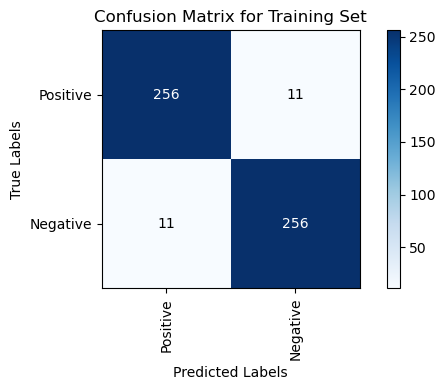

Training Accuracy: 0.9588014981273408
Area under ROC curve: 0.9588014981273408


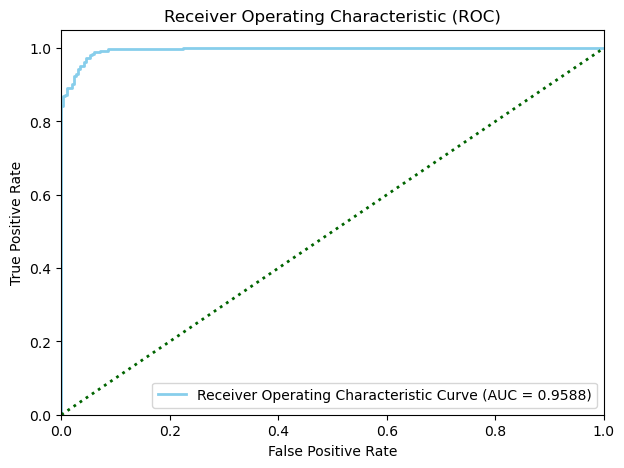


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143


Confusion Matrix for Test Set:


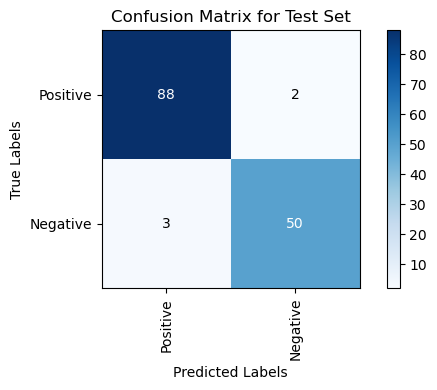

Test Accuracy: 0.965034965034965
Area under ROC curve: 0.960587002096436


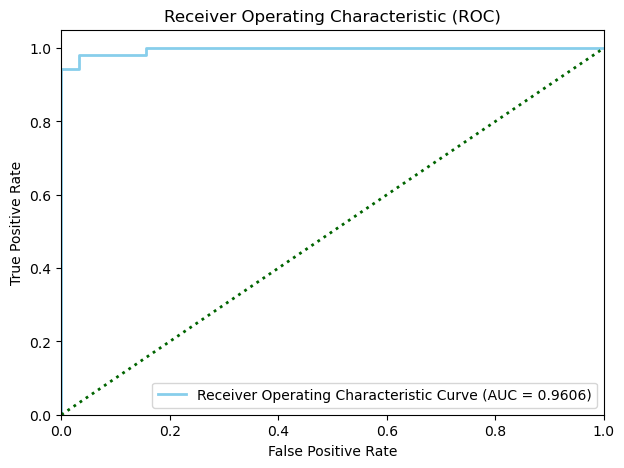

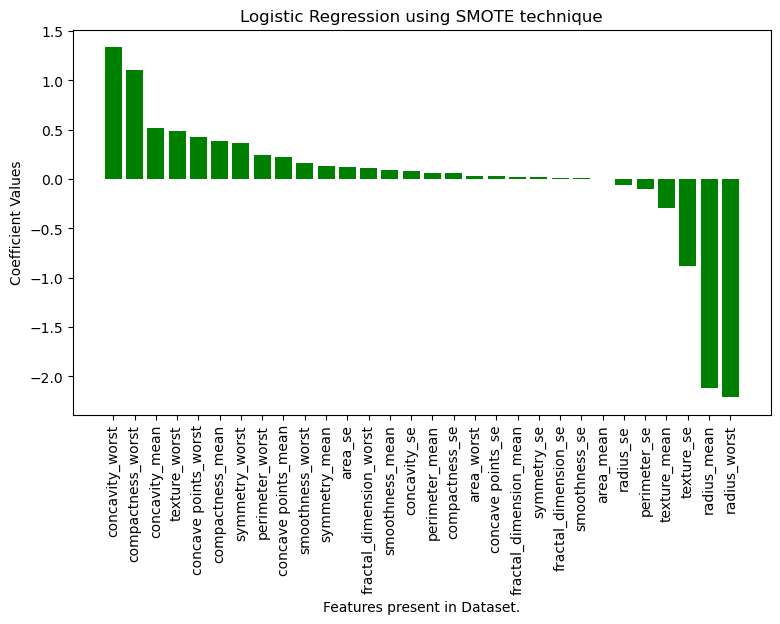

In [21]:
logit_smote = LogisticRegression()

# Function call to breast cancer prediction
classification_algo_with_feature_imp(logit_smote, oversample_X, tstng_st_x, oversample_Y, tstng_st_y, independent_features, "coefficients","Logistic Regression using SMOTE technique")



Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       267
           1       0.96      0.93      0.94       267

    accuracy                           0.94       534
   macro avg       0.94      0.94      0.94       534
weighted avg       0.94      0.94      0.94       534

Confusion Matrix for Training Set:


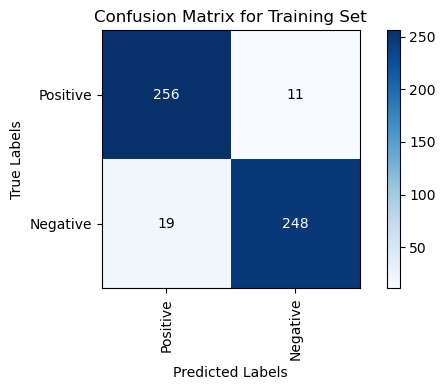

Training Accuracy: 0.9438202247191011
Area under ROC curve: 0.9438202247191011


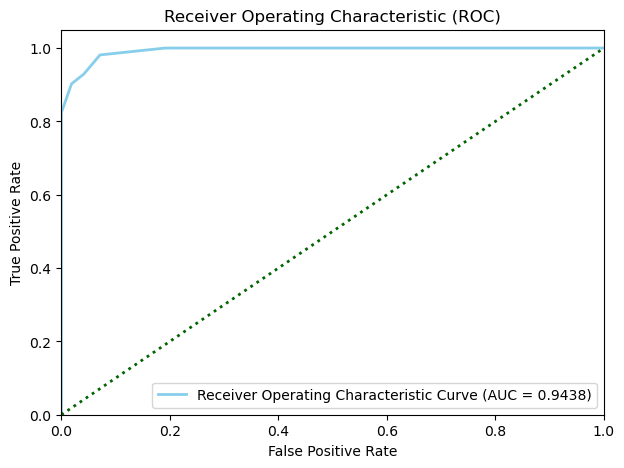


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


Confusion Matrix for Test Set:


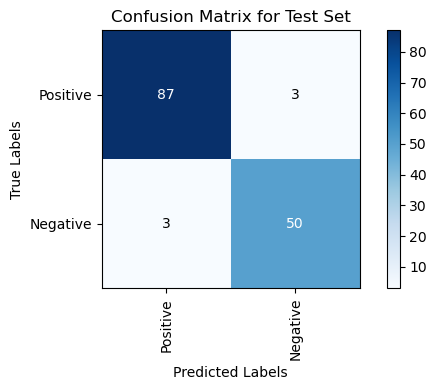

Test Accuracy: 0.958041958041958
Area under ROC curve: 0.9550314465408805


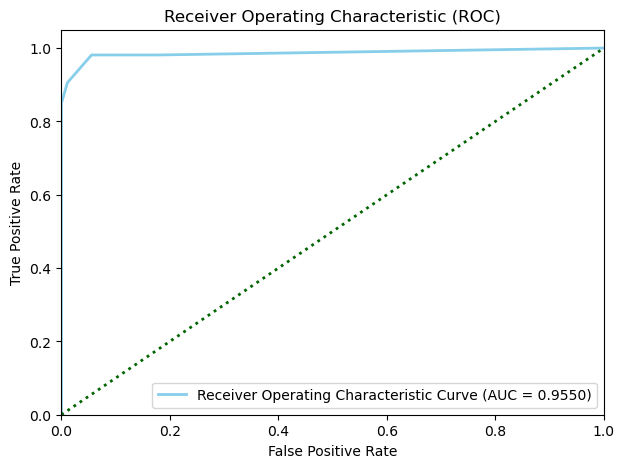

In [22]:


knn = KNeighborsClassifier()

classification_algo_without_feature_imp(knn,oversample_X, tstng_st_x, oversample_Y, tstng_st_y,"KNN")



Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       267
           1       0.98      0.90      0.93       267

    accuracy                           0.94       534
   macro avg       0.94      0.94      0.94       534
weighted avg       0.94      0.94      0.94       534

Confusion Matrix for Training Set:


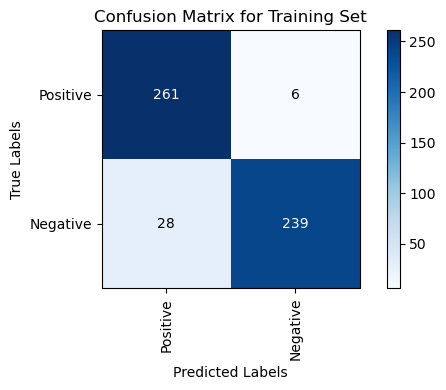

Training Accuracy: 0.9363295880149812
Area under ROC curve: 0.9363295880149812


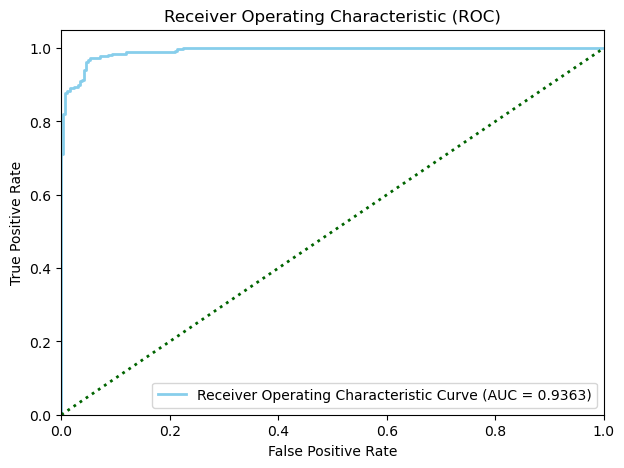


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        90
           1       0.91      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143


Confusion Matrix for Test Set:


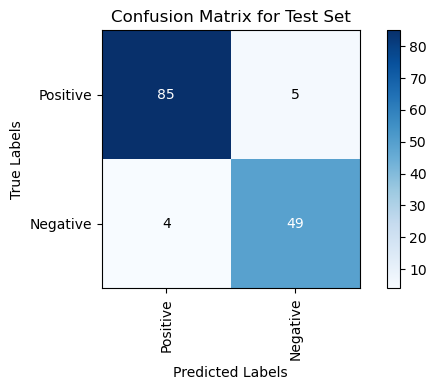

Test Accuracy: 0.9370629370629371
Area under ROC curve: 0.9344863731656184


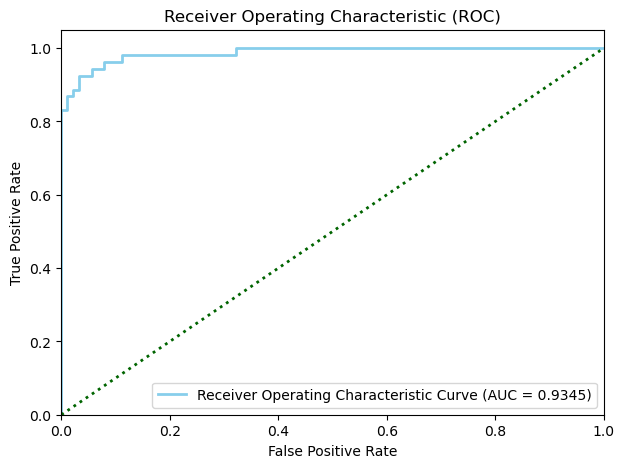

In [23]:
#Gaussian Naive Bayes.

gnb = GaussianNB(priors=None)

classification_algo_without_feature_imp(gnb,oversample_X, tstng_st_x, oversample_Y, tstng_st_y,"Naive Bayees")


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       267
           1       0.96      0.98      0.97       267

    accuracy                           0.97       534
   macro avg       0.97      0.97      0.97       534
weighted avg       0.97      0.97      0.97       534

Confusion Matrix for Training Set:


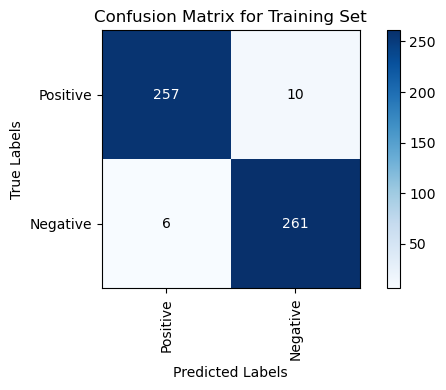

Training Accuracy: 0.9700374531835206
Area under ROC curve: 0.9700374531835206


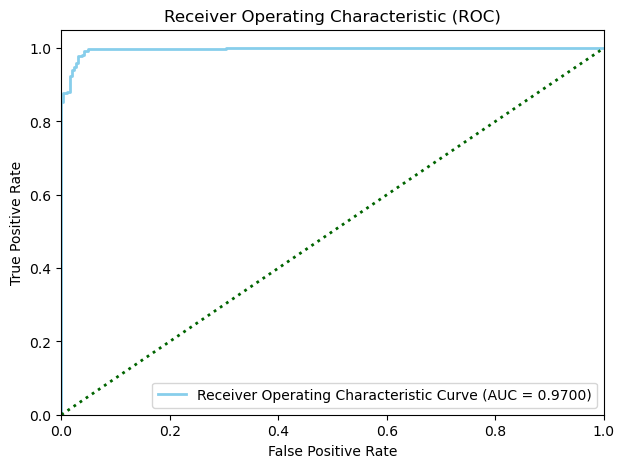


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


Confusion Matrix for Test Set:


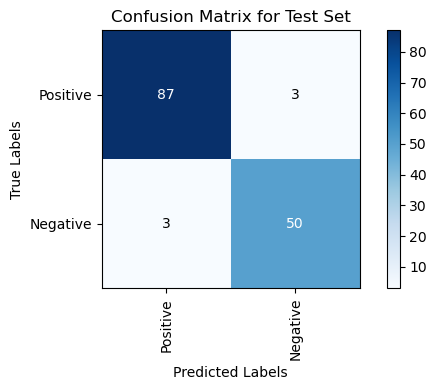

Test Accuracy: 0.958041958041958
Area under ROC curve: 0.9550314465408805


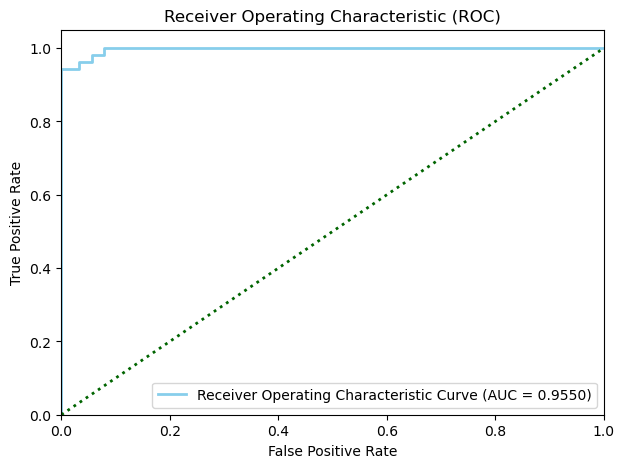

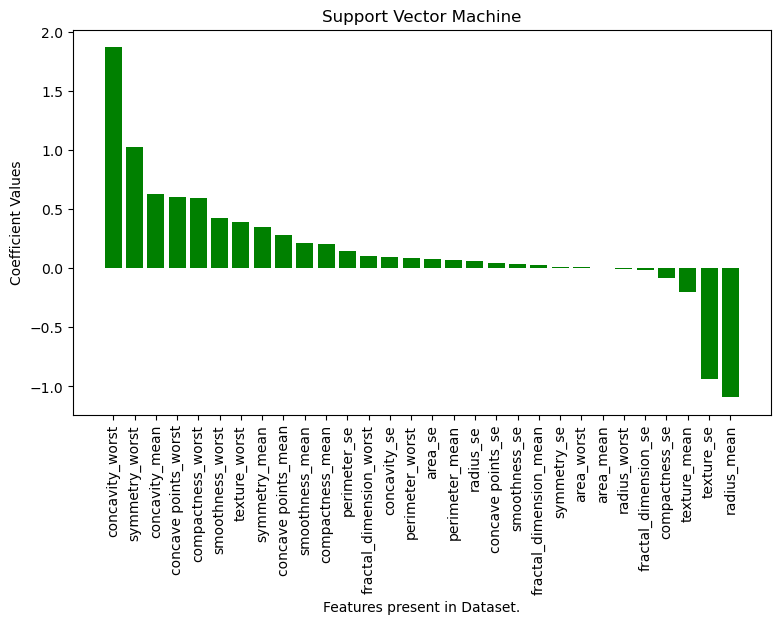

In [24]:
#Support Vector Machine


svc_lin  = SVC(  kernel='linear',probability=True)


classification_algo_with_feature_imp(svc_lin, oversample_X, tstng_st_x, oversample_Y, tstng_st_y, independent_features, "coefficients","Support Vector Machine")


In [25]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.



Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       267

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534

Confusion Matrix for Training Set:


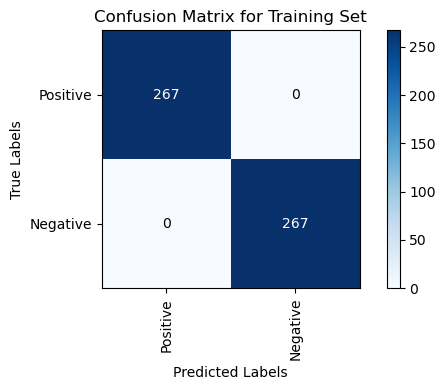

Training Accuracy: 1.0
Area under ROC curve: 1.0


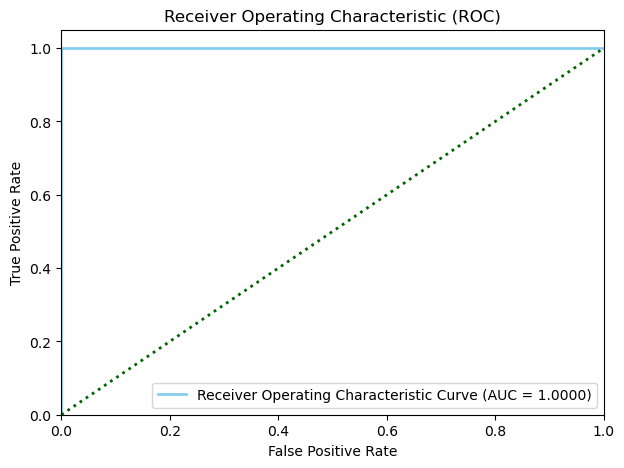


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


Confusion Matrix for Test Set:


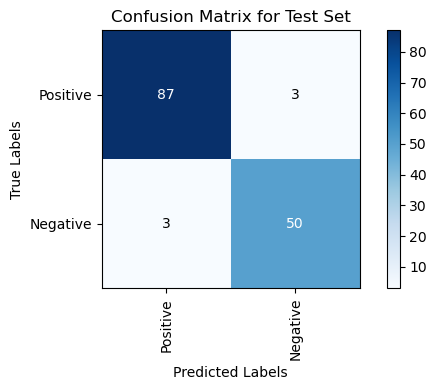

Test Accuracy: 0.958041958041958
Area under ROC curve: 0.9550314465408805


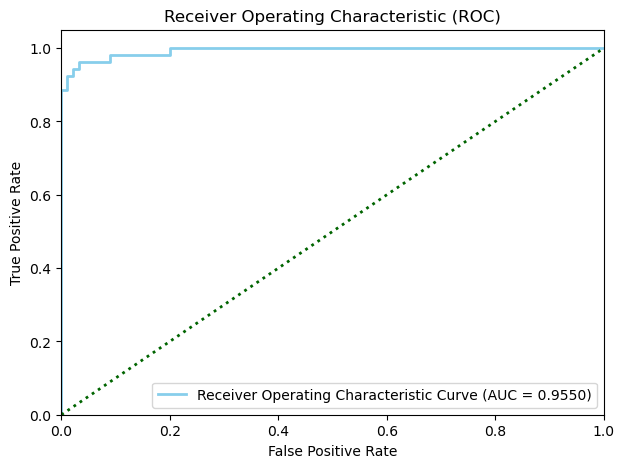

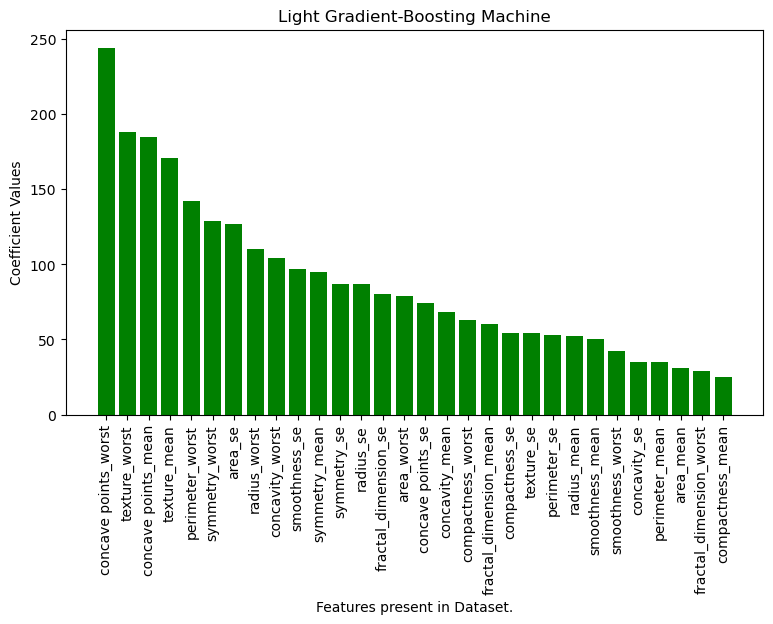

In [26]:
#LightGBMClassifier


lgbm_c = LGBMClassifier(verbose=-1)

classification_algo_with_feature_imp(lgbm_c, oversample_X, tstng_st_x, oversample_Y, tstng_st_y, independent_features, "features","Light Gradient-Boosting Machine")



Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       267

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534

Confusion Matrix for Training Set:


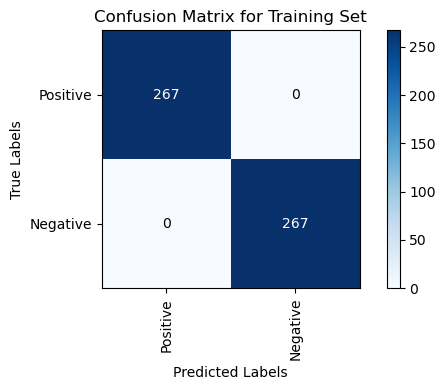

Training Accuracy: 1.0
Area under ROC curve: 1.0


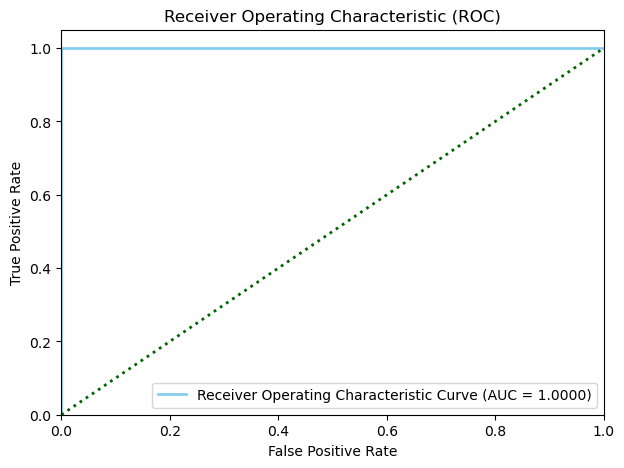


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


Confusion Matrix for Test Set:


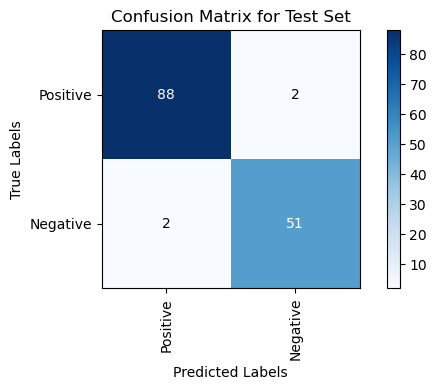

Test Accuracy: 0.972027972027972
Area under ROC curve: 0.9700209643605869


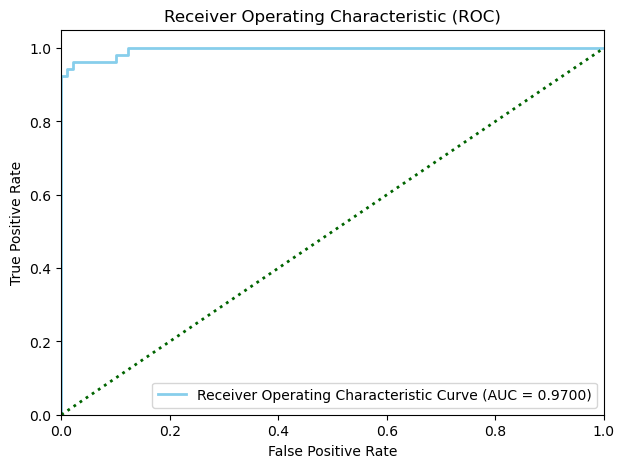

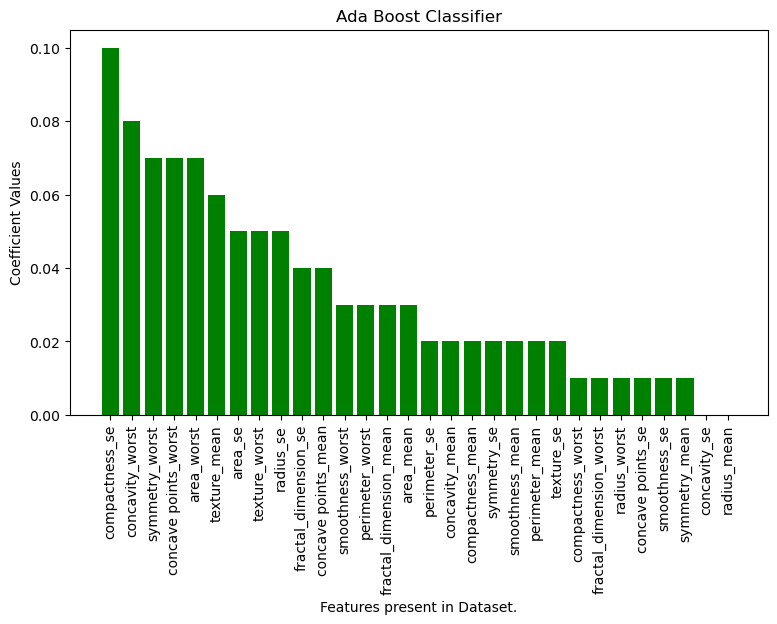

In [27]:
#LightGBMClassifier



ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)


classification_algo_with_feature_imp(ada_classifier, oversample_X, tstng_st_x, oversample_Y, tstng_st_y, independent_features, "features","Ada Boost Classifier")


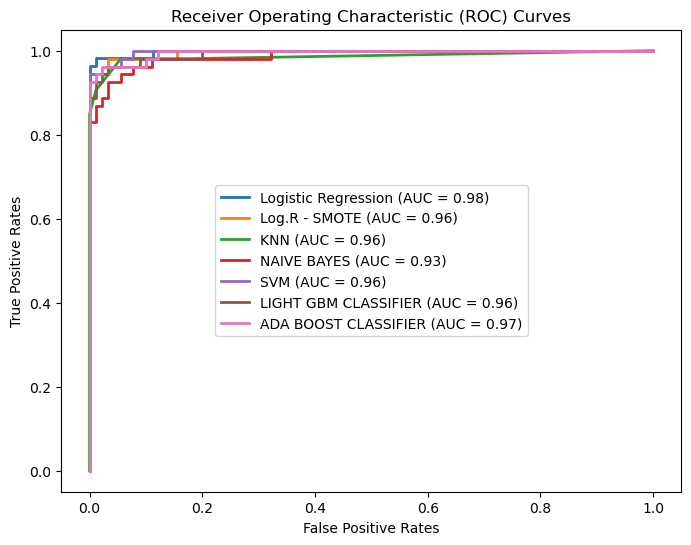

In [28]:
a = "Logistic Regression"
b = "Log.R - SMOTE"
c = "KNN"
d = "NAIVE BAYES"
e = "SVM"
f = "LIGHT GBM CLASSIFIER"
g = "ADA BOOST CLASSIFIER"
plt.figure(figsize=(8, 6))
classifier_names=[a,b,c,d,e,f,g]
for fprates, tprates, auc_vals, clf_nmee in zip(fprate_curves, tprate_curves, auc_curves, classifier_names):
    plt.plot(fprates, tprates, lw=2, label=f'{clf_nmee} (AUC = {auc_vals:.2f})')





plt.ylabel('True Positive Rates')
plt.xlabel('False Positive Rates')

plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='center')
plt.show()

In [ ]:
#Model Performances
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import plotly.figure_factory as ff
import plotly.offline as pyoff

#gives model report in dataframe
def mdl_reports(mdl,trning_x,tstingx,trning_y,tstingy,nme) :
    mdl.fit(trning_x,trning_y)
    predc  = mdl.predict(tstingx)
    a     = accuracy_score(tstingy,predc)
    rs  = recall_score(tstingy,predc)
    p    = precision_score(tstingy,predc)
    rc     = roc_auc_score(tstingy,predc)
    f1      = f1_score(tstingy,predc) 
    km = cohen_kappa_score(tstingy,predc)
    
    df = pds.DataFrame({"Model"           : [nme],
                       "Accuracy_score"  : [a],
                       "Recall_score"    : [rs],
                       "Precision"       : [p],
                       "f1_score"        : [f1],
                       "Area_under_curve": [rc],
                       "Kappa_metric"    : [km],
                      })
    return df

mdl1 = mdl_reports(logistic_model, x_trning_dt_set, x_tsting_dt_set, y_trning_dt_set, y_tsting_dt_set,"Logistic Regression  ")
mdl2 = mdl_reports(logit_smote, oversample_X, tstng_st_x, oversample_Y, tstng_st_y,"Log.R - SMOTE  ")
mdl3 = mdl_reports(knn,oversample_X, tstng_st_x, oversample_Y, tstng_st_y,"KNN Classifier  ")
mdl4 = mdl_reports(gnb,oversample_X, tstng_st_x, oversample_Y, tstng_st_y,"Naive Bayes Classifier  ")
mdl5 = mdl_reports(svc_lin,oversample_X, tstng_st_x, oversample_Y, tstng_st_y,"SVM Classifier  ")
mdl6 = mdl_reports(lgbm_c,oversample_X, tstng_st_x, oversample_Y, tstng_st_y,"LGBM Classifier  ")
mdl7 = mdl_reports(ada_classifier,oversample_X, tstng_st_x, oversample_Y, tstng_st_y,"AdaBoost Classifier  ")

#concat all models
mdl_perf = pds.concat([mdl1,mdl2,mdl3,mdl4,mdl5,mdl6,mdl7],axis = 0).reset_index()
mdl_perf = mdl_perf.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(mdl_perf,3))
pltoff.iplot(table)

C:\Users\gurra\anaconda\Lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\gurra\anaconda\Lib\site-packages\plotly\express\imshow_utils.py:24: DeprecationWarning:

`np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)

